# Examples

Below we show three examples of the mx_viz functions. Please see the `slide_figures.ipynb` and the OHBM 2020 multilayer network educational presentation for more details.

In [1]:
## Import packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import multinetx as mx
import scipy.io as sio
import pandas as pd
import os
import sys
import mx_viz

print("Done importing packages :)")

finished defining functions
Done importing packages :)


## Create a multilayer network

Using multinetx, we will create a small multilayer (mx) network for plotting later. Note that the visualization functions will work best with _small_ mx networks. For larger mx networks, consider alternative plotting strategies found in this [2019 paper](https://onlinelibrary.wiley.com/doi/full/10.1111/cgf.13610).

Note below we will assume that all nodes exist in every layer and that nodes only connect to their counterparts in other layers.

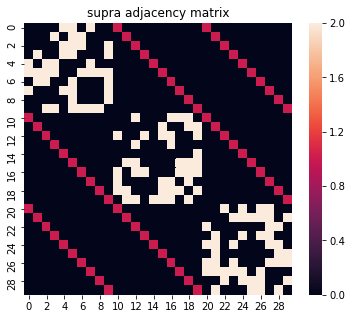

In [2]:
# Define number of nodes (number of nodes in largest layer).
nNodes = 10

# Define number of levels.
nLayers = 3

# Use multinetx to generate three graphs each on nNodes nodes.
g1 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=216)
g2 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=130)
g3 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=81)

# Define adjacency between layers. Here we only assign nodes to themselves in each layer.
adj_block = mx.lil_matrix(np.zeros((nNodes*nLayers,nNodes*nLayers)))

for i in np.arange(nLayers-1):
    for l in np.arange(i+1,nLayers):
        adj_block[i*nNodes:(i+1)*nNodes, (l)*nNodes:(l+1)*nNodes] = np.identity(nNodes)   

adj_block += adj_block.T

# Create multilayer graph with mx.
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3],
                        inter_adjacency_matrix=adj_block)

# Here we can set the edge weights to different values just so we can see which are inter- and intra-layer edges.
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)

## Plot the supra-adjacency matrix to check that we actually made a multilayer network.
fig = plt.figure(figsize=(6,5))
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
plt.title('supra adjacency matrix');


### Write to json and create visualization.

The first mx_viz function writes the graph to a json file, while the second reads the file and creates an html file with the visualization. 

Below we will create two html files - one using the `theme="light"` flag and the other with `theme="dark"`.

In [3]:
# We'll use networkx positioning to get nice layouts. However pos is changed (for example by 
# using a different nx.layout function), it should remain a dictionary mapping nodes to coordinate 
# arrays with at least an x and y position.
pos = nx.layout.fruchterman_reingold_layout(g1, dim=3, k=2)

filename_json = "data/example1.json"
G2 = mx_viz.write_mx_to_json(filename_json,mg, nNodes, pos, nLayers)

filename_html_light = "visualization_output_example_light.html"
mx_viz.visualize(G2,theme="light",path_html=filename_html_light)

filename_html_dark = "visualization_output_example_dark.html"
mx_viz.visualize(G2,theme="light",path_html=filename_html_dark);


done writing mx to data/example1.json
Wrote visualization to: visualization_output_example_light.html
Wrote visualization to: visualization_output_example_dark.html


## Create a temporal network

Temporal networks are special types of multilayer networks in which the layers correspond to timepoints. Time has a natural ordering, so we create a slightly different visualization that respects the ordered layers.

Again, we assume that all nodes exist in every layer and that nodes connect only to their counterparts in every layer.


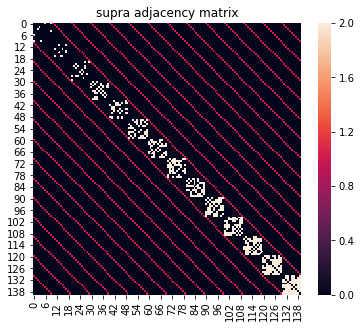

In [4]:
# Define number of nodes (number of nodes in largest layer)
nNodes = 10

# Define number of timepoints (levels)
nLayers = 14

# Use multinetx to generate fourteen graphs each on nNodes nodes
graph_layers = [mx.generators.erdos_renyi_graph(nNodes,((i+3)/(nLayers+5)),seed=np.random.randint(1,300)) for i in np.arange(nLayers)]

# Define adjacency between layers. Here, again, we only assign nodes to themselves in each layer.
adj_block = mx.lil_matrix(np.zeros((nNodes*nLayers,nNodes*nLayers)))

for i in np.arange(nLayers-1):
    for l in np.arange(i+1,nLayers):
        adj_block[i*nNodes:(i+1)*nNodes, (l)*nNodes:(l+1)*nNodes] = np.identity(nNodes)   

adj_block += adj_block.T

# Create multilayer graph
mg = mx.MultilayerGraph(list_of_layers=graph_layers,
                        inter_adjacency_matrix=adj_block)

# Set edge weights
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=1)

## Plot the supra-adjacency matrix
fig = plt.figure(figsize=(6,5))
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
plt.title('supra adjacency matrix');

In [5]:
# As before, generate positions for nodes in the first layer.
pos = nx.layout.fruchterman_reingold_layout(g1, dim=3)

filename_json = "data/example2.json"
G2 = mx_viz.write_mx_to_json(filename_json,mg, nNodes, pos, nLayers)

filename_html = "visualization_output_example_timeseries.html"
mx_viz.visualize_timeseries(G2, path_html=filename_html);

done writing mx to data/example2.json
Wrote visualization to: visualization_output_example_timeseries.html


Open the html files in your browser and enjoy!